# Potato Disease Classification


# Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
# Ensure PIL is installed for image processing
try:
    from PIL import Image
except ImportError:
    raise ImportError("PIL (Pillow) is required to load images. Install it using `pip install Pillow`.")

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output\\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 16504 images belonging to 15 classes.


In [5]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.50771475 0.4410481  0.5037932 ]
  [0.5042997  0.43763307 0.5003782 ]
  [0.61035234 0.5436857  0.60643077]
  ...
  [0.5580702  0.5031682  0.5698349 ]
  [0.55976456 0.5048626  0.57152927]
  [0.561459   0.50655705 0.5732237 ]]

 [[0.50848496 0.44181827 0.5045634 ]
  [0.49906245 0.4323958  0.49514088]
  [0.6152815  0.54861486 0.61135995]
  ...
  [0.5995731  0.5446711  0.6113378 ]
  [0.59895694 0.544055   0.61072165]
  [0.59834075 0.5434388  0.61010545]]

 [[0.5092551  0.44258848 0.50533354]
  [0.49382517 0.42715847 0.4899036 ]
  [0.6202107  0.55354404 0.61628914]
  ...
  [0.58503973 0.5301378  0.59680444]
  [0.586118   0.531216   0.5978827 ]
  [0.58719623 0.5322943  0.59896094]]

 ...

 [[0.56696117 0.4963729  0.54343176]
  [0.56465054 0.49406233 0.5411211 ]
  [0.56234    0.49175176 0.5388106 ]
  ...
  [0.61969215 0.55694705 0.6000843 ]
  [0.47475103 0.4120059  0.45514315]
  [0.56207156 0.4993265  0.5424637 ]]

 [[0.5677979  0.4972096  0.5442685 ]
  [0.56810594 0.4975177  0.5445765 ]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output\\val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2058 images belonging to 15 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'output\\test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2076 images belonging to 15 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.8060398  0.7504318  0.74509805]
  [0.8047141  0.74954796 0.74509805]
  [0.8040994  0.7491974  0.74527586]
  ...
  [0.7934692  0.7464103  0.7464103 ]
  [0.785676   0.7386172  0.7386172 ]
  [0.7939603  0.7404704  0.7404704 ]]

 [[0.81772965 0.75890607 0.74714136]
  [0.81640387 0.75758034 0.74581563]
  [0.8150781  0.7564573  0.74509805]
  ...
  [0.7925853  0.7455265  0.7455265 ]
  [0.7847921  0.7377333  0.7377333 ]
  [0.79528606 0.7409124  0.7409124 ]]

 [[0.8281072  0.76928365 0.75751895]
  [0.82766527 0.76884174 0.75707704]
  [0.82676786 0.76794434 0.75617963]
  ...
  [0.7917015  0.7446427  0.7446427 ]
  [0.784922   0.7374577  0.7374577 ]
  [0.7966118  0.74170977 0.74170977]]

 ...

 [[0.86043423 0.8055323  0.7937676 ]
  [0.8850581  0.8264373  0.8146726 ]
  [0.8160915  0.75726795 0.74550325]
  ...
  [0.9012274  0.8541686  0.8541686 ]
  [0.89589727 0.84883845 0.84883845]
  [0.8914781  0.8444193  0.8444193 ]]

 [[0.8643301  0.8091639  0.7973992 ]
  [0.8817302  0.8229067  0.81114197]


## Building the Model

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(train_generator.class_indices)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

d:\Projects\Potato Disease Classification\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,527 (720.81 KB)

 Trainable params: 184,527 (720.81 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
1506/32

47.0625

In [15]:
215/32

6.71875

In [16]:

history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=2,
)

Epoch 1/2


d:\Projects\Potato Disease Classification\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.1290 - loss: 2.6228 - val_accuracy: 0.1198 - val_loss: 2.5307
Epoch 2/2
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 841ms/step - accuracy: 0.2060 - loss: 2.4147 - val_accuracy: 0.2656 - val_loss: 2.2774


In [17]:
scores = model.evaluate(test_generator)

65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 458ms/step - accuracy: 0.2743 - loss: 2.3124


In [18]:
scores

[2.3293144702911377, 0.2649325728416443]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [19]:
history

In [20]:
history.params

{'verbose': 1, 'epochs': 2, 'steps': 47}

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [22]:
type(history.history['loss'])

list

In [23]:
len(history.history['loss'])

2

In [24]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.5590410232543945, 2.3785881996154785]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
val_acc

[0.1197916641831398, 0.265625]

In [27]:
acc

[0.14973261952400208, 0.22140957415103912]

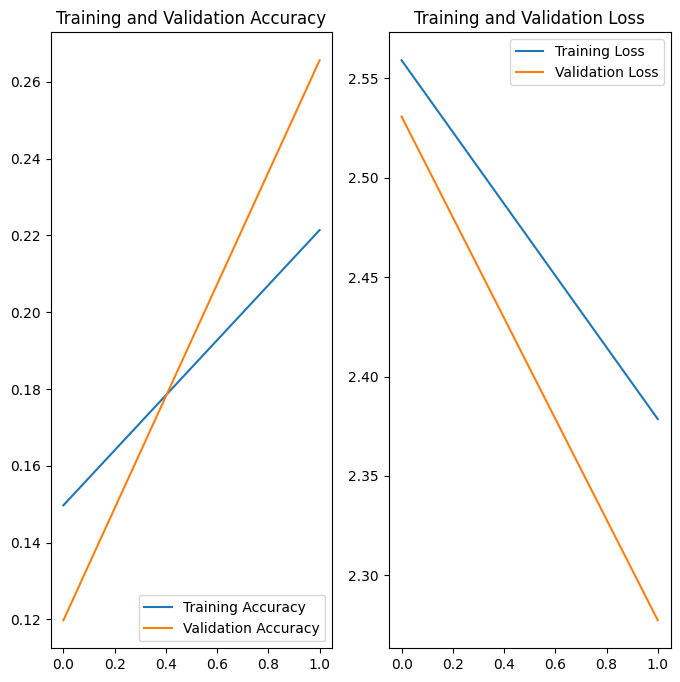

In [28]:
EPOCHS = 2

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus


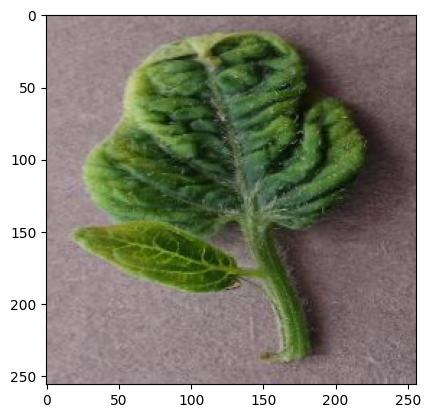

In [29]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


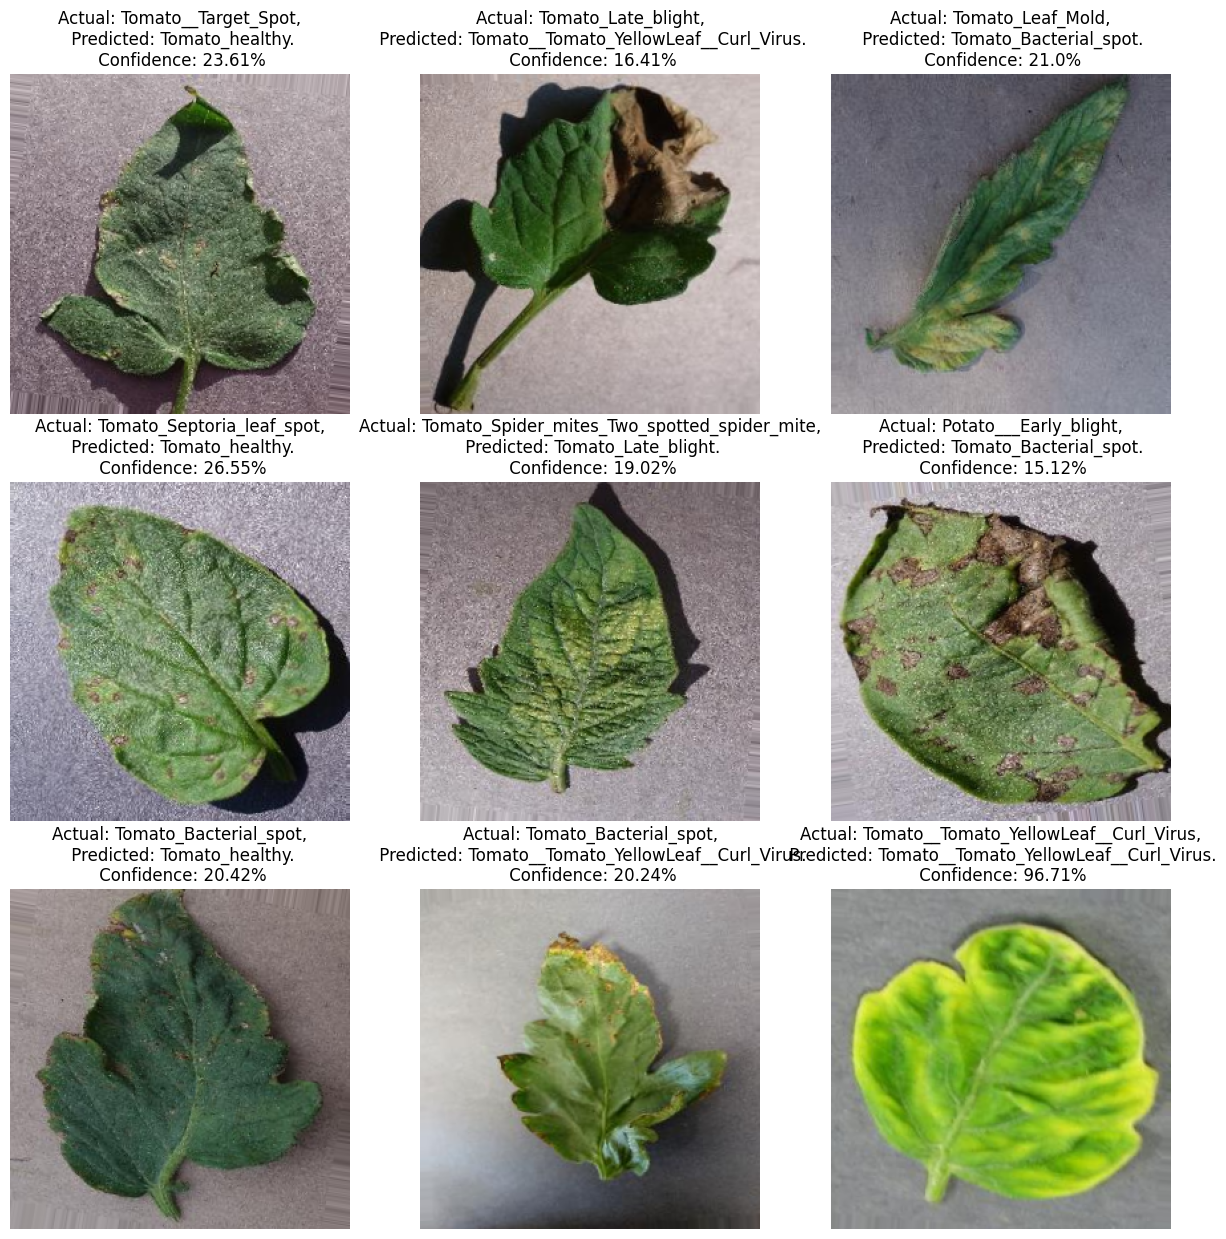

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [32]:
model.save('my_model.keras')